# Paper Rock Sessiors
This notebook is using Python Tensorflow/Keras to build a Convolution Neural Network (CNN) to classify an image of human hand into "Paper", "Rock", or "Scissors".

How to use the notebook:
1.   Upload the dataset of images to the notebook Files.
2.   Make sure the machine is running with GPU. 
Go to *Runtime > Change Runtime Type >  Hardware Acceleration > GPU*
3.   Run each code block in sequence

Happy coding 🦾

In [ ]:
!unzip rps.zip -d /content/rps

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

rock_dir = "/content/rps/train/rock"
paper_dir = "/content/rps/train/paper"
scissors_dir = "/content/rps/train/scissors"

# Printing the number of images in each folder (for double checking)
print(len(os.listdir(rock_dir)))
print(len(os.listdir(paper_dir)))
print(len(os.listdir(scissors_dir)))

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setting a data augmetation generator for training
train_dir = "/content/rps/train"
train_datagen = ImageDataGenerator(rescale=1./255, \
                                   rotation_range=90, \
                                   width_shift_range=0.2, \
                                   height_shift_range=0.2, \
                                   shear_range=0.1, \
                                   zoom_range=0.2, \
                                   horizontal_flip=True, \
                                   fill_mode='nearest', \
                                   brightness_range=(0.3,0.7)
                                   )
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), \
                                                    batch_size=20, class_mode="categorical", color_mode='grayscale')

# Setting a data generator for validation data
valid_dir = "/content/rps/valid"
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(150,150), \
                                                    batch_size=20, class_mode="categorical", color_mode='grayscale')

# Setting a data generator for testing data
test_dir = "/content/rps/test"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), \
                                                    batch_size=20, class_mode="categorical", color_mode='grayscale')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Found 33 images belonging to 3 classes.


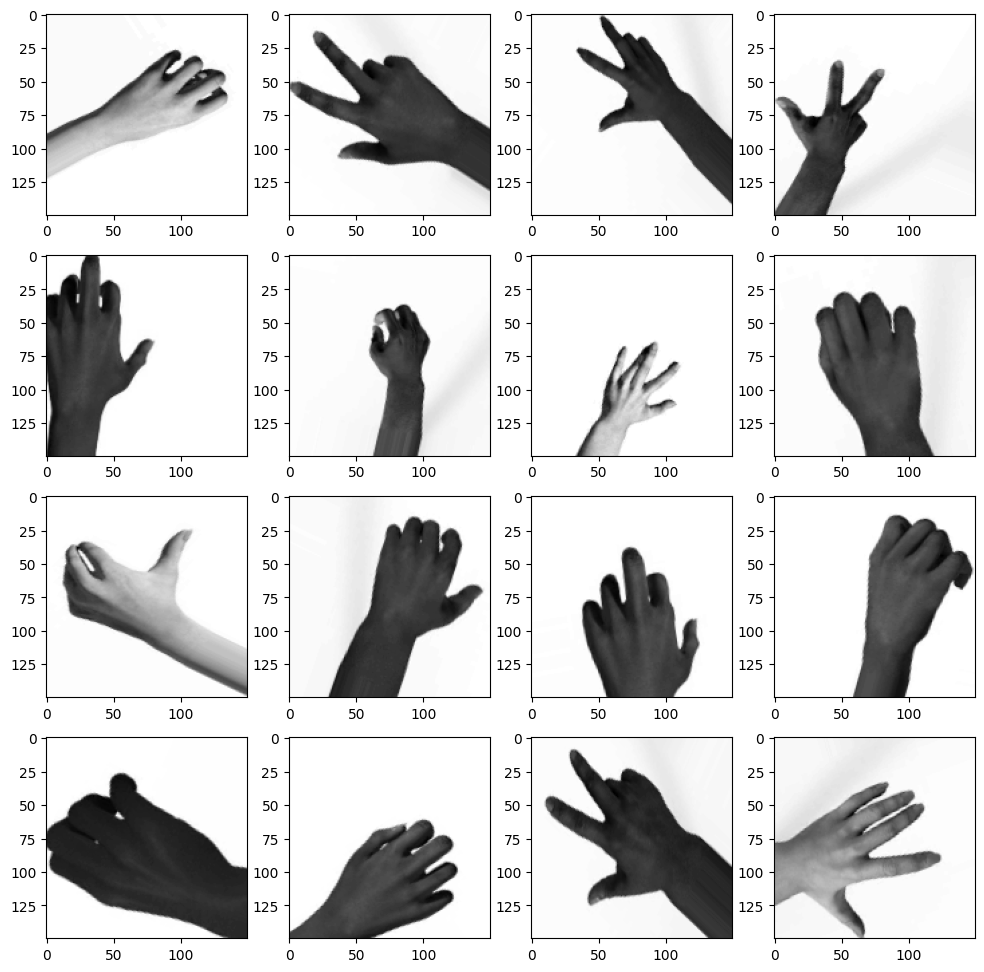

In [4]:
# plotting sample of the training images
# Note: you can save the image by right-clicking on it
import matplotlib.pyplot as plt
x_batch, y_batch = next(train_generator)
f, axarr = plt.subplots(4,4, figsize=(12, 12))
for i in range(4):
  for j in range(4):
    image = x_batch[i*4+j]
    axarr[i,j].imshow(image,cmap='gray')
plt.show()

In [5]:
# This code will create the model
# You can add more layers, change the number of filters (kernals), 
# and improve the accuracy!

from tensorflow.keras import layers

def create_model():
  model = keras.Sequential()

  # Layer 1: Convolution with 64 filters (3x3) followed by Max Polling layer
  model.add(layers.Conv2D(64, (3,3), input_shape=(150,150,1), activation='relu'))
  model.add(layers.MaxPooling2D())

  # Layer 2: Convolution with 64 filters (3x3) followed by Max Polling layer
  model.add(layers.Conv2D(64, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D())

  # Layer 3: Convolution with 128 filters (3x3) followed by Max Polling layer
  model.add(layers.Conv2D(128, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D())

  # Layer 4: Convolution with 128 filters (3x3) followed by Max Polling layer
  model.add(layers.Conv2D(128, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D())

  # Layer 5: Fully connected Layer
  model.add(layers.Flatten())
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(512, activation='relu'))

  # Layer 6: Output Layer
  model.add(layers.Dense(3, activation='softmax'))
  return model

model = create_model()

# Print a summary about the model (for double checking)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [6]:
# Start training for 15 epochs (you can choose less or more epochs)
model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['acc'])
hist = model.fit(train_generator, epochs=15, validation_data=valid_generator)

Epoch 1/15
126/126 [==============================] - 25s 108ms/step - loss: 1.1160 - acc: 0.3421 - val_loss: 1.0962 - val_acc: 0.3333
Epoch 2/15
126/126 [==============================] - 12s 97ms/step - loss: 1.0674 - acc: 0.4171 - val_loss: 0.7854 - val_acc: 0.7312
Epoch 3/15
126/126 [==============================] - 12s 97ms/step - loss: 0.8809 - acc: 0.5615 - val_loss: 0.7214 - val_acc: 0.6129
Epoch 4/15
126/126 [==============================] - 12s 97ms/step - loss: 0.6882 - acc: 0.6972 - val_loss: 0.4908 - val_acc: 0.7849
Epoch 5/15
126/126 [==============================] - 12s 95ms/step - loss: 0.5158 - acc: 0.7909 - val_loss: 0.4020 - val_acc: 0.8065
Epoch 6/15
126/126 [==============================] - 12s 97ms/step - loss: 0.4126 - acc: 0.8496 - val_loss: 0.8740 - val_acc: 0.7661
Epoch 7/15
126/126 [==============================] - 12s 97ms/step - loss: 0.3472 - acc: 0.8683 - val_loss: 0.3259 - val_acc: 0.8737
Epoch 8/15
126/126 [==============================] - 12s 98m

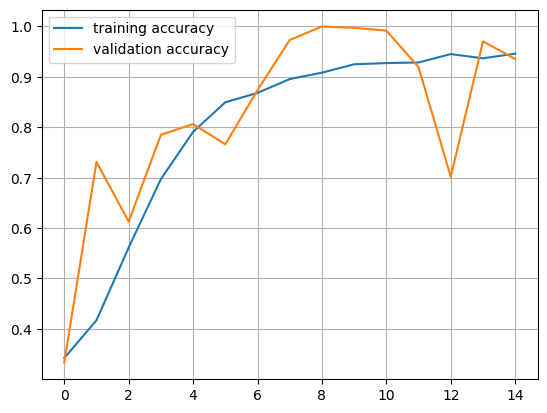

In [7]:
# Plotting the training accuracy VS validation accuracy
# The model performs well if both are increasing together
# The model performs bad if the validation accuracy drops
# Note: you can save the image by right-clicking on it

import matplotlib.pyplot as plt

acc = hist.history['acc']
val_acc = hist.history['val_acc']
epochs = range(len(acc))

plt.plot(epochs, acc, label="training accuracy")
plt.plot(epochs, val_acc, label = "validation accuracy")
plt.legend()
plt.grid()
plt.show()

In [8]:
# Evaluate the model on the test data
print("Evaluate on test data")
results = model.evaluate(test_generator)
print("test loss, test acc:", results)

Evaluate on test data
2/2 [==============================] - 0s 316ms/step - loss: 1.5019 - acc: 0.8788
test loss, test acc: [1.501908302307129, 0.8787878751754761]


In [9]:
# Save the model
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

pb_model_path = "/content"
# define the name of .pb model (please change!)
pb_model_name = "rps_model.pb"

os.makedirs(pb_model_path, exist_ok=True)
tf_model_graph = tf.function(lambda x: model(x))
tf_model_graph = tf_model_graph.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))
# obtain frozen concrete function
frozen_tf_func = convert_variables_to_constants_v2(tf_model_graph)
frozen_tf_func.graph.as_graph_def()

# save full tf model
tf.io.write_graph(graph_or_graph_def=frozen_tf_func.graph,
                  logdir=pb_model_path,
                  name=pb_model_name,
                  as_text=False)

'/content/rps_model.pb'

Predicted class: Rock


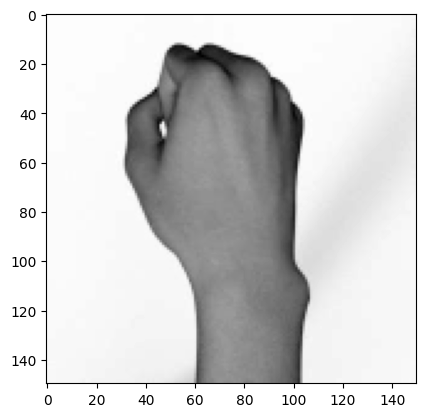

In [12]:
# Testing on a single image
# Note: upload your image to the files section, and then provide the path to
# the image to evaluate performance of the model
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

# The path for the image to test the model (change to the path of your test image)
test_img_path = "/content/rps/valid/rock/testrock01-00_png.rf.9fb3b294595cff53ba76bef13e210814.jpg"

# Read and pre-process the image
img = cv2.imread(test_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img/255.0
img = cv2.resize(img, (150,150))

# Plot the image
plt.imshow(img, cmap='gray')
img = np.expand_dims(img, axis=0) # image shape is (1,150,150,1)

# Make prediction
output = model.predict(img, verbose=False)
rps_class_id = np.argmax(output)
rps_labels = ['Paper', "Rock", "Scissor"]
print("Predicted class: " + rps_labels[rps_class_id])